In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/data/train.json")

In [3]:
df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [4]:
df.shape

(6807, 5)

In [5]:
summary_statistics = df.describe()
summary_statistics

,document
count,6807.000000
mean,14739.782283
std,4920.715769
min,7.000000
25%,11061.500000
50%,14818.000000
75%,18974.000000
max,22687.000000


In [6]:
missing_values = df.isnull().sum()
missing_values

document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
dtype: int64

No missing values!

### EDA

##### 1. Finding the distribution of Document Lengths

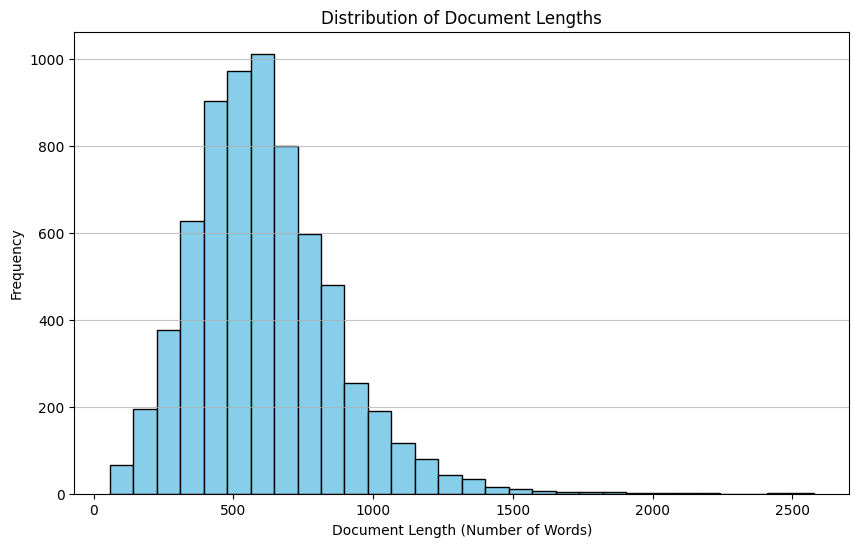

(count    6807.000000
 mean      609.387983
 std       253.471527
 min        57.000000
 25%       437.000000
 50%       583.000000
 75%       749.000000
 max      2578.000000
 Name: doc_length, dtype: float64,
 None)

In [7]:
df['doc_length'] = df['full_text'].apply(lambda x: len(x.split()))

doc_length_summary = df['doc_length'].describe()

plt.figure(figsize=(10, 6))
plt.hist(df['doc_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

doc_length_summary, plt.show()

##### 2. Word Cloud for the most common words in the dataset

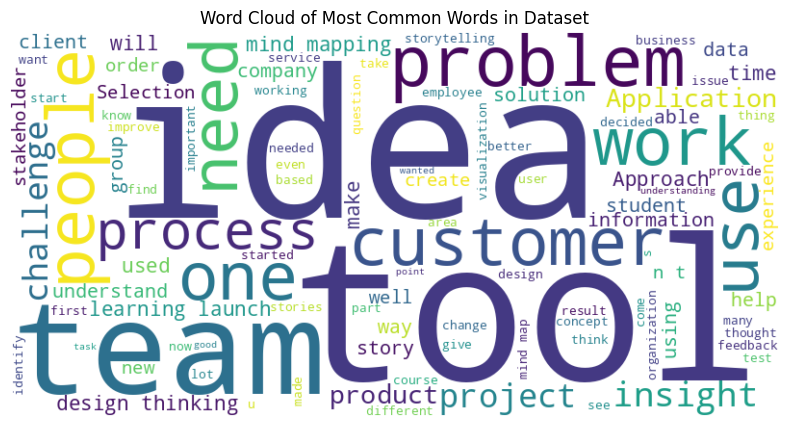

In [8]:
from wordcloud import WordCloud, STOPWORDS

all_tokens_str = ' '.join([' '.join(tokens) for tokens in df['tokens']])

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400, max_words=100).generate(all_tokens_str)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Dataset')
plt.show()


##### 3. Finding the avg document length and no of unique words

In [9]:
sample_texts = df['full_text'].sample(5).values
print(sample_texts)
print("\n")

# Average document length (in terms of words)
average_doc_length = df['full_text'].apply(lambda x: len(x.split())).mean()
print("Average doc length: ", average_doc_length)
print("\n")

# Unique words in the dataset
unique_words = set(word for document in df['full_text'] for word in document.split())
unique_word_count = len(unique_words)
print("Unique word count:", unique_word_count)

['Reflection – Learning launch\n\nChallenge\n\nAs part of the digital product team we have dedicated a large part of our time and effort to identify and  understand the pain that our users have in each of the points of contact they have on their journey  when using our ecommerce, the analysis of all these needs We have converted them into improvement  ideas that are designed and prototypes ready to be tested, due to the dynamics of the business we have  developed and released these improvements without previously testing with our clients, resulting in  solutions that do not work or that had to be pivoted to search better roads.\n\nSelection\n\nWith this scenario from the digital product team we carry out the implementation of the learning launch  tool that has allowed us to "get to the truth and then the truth confirms or not your assumptions." In  short, test the hypotheses with our clients to understand that we are on the right track, modify the  hypothesis to retest it or stop with 

##### 4. Finding the number of unique labels

In [10]:
from ast import literal_eval
import collections

def safe_convert(s):
    if isinstance(s, list):
        return s
    elif isinstance(s, str):
        s = s.strip('[]')
        return [item.strip(" '\"") for item in s.split(',')]
    else:
        return None

df['labels_list'] = df['labels'].apply(safe_convert)

all_labels = [label for sublist in df['labels_list'] for label in sublist]

label_frequency = collections.Counter(all_labels)

most_common_labels = label_frequency.most_common()

unique_label_count = len(label_frequency)

print("Most Common Labels:",most_common_labels)
print("\n")
print("Unique Label Count:", unique_label_count)


Most Common Labels: [('O', 4989794), ('B-NAME_STUDENT', 1365), ('I-NAME_STUDENT', 1096), ('B-URL_PERSONAL', 110), ('B-ID_NUM', 78), ('B-EMAIL', 39), ('I-STREET_ADDRESS', 20), ('I-PHONE_NUM', 15), ('B-USERNAME', 6), ('B-PHONE_NUM', 6), ('B-STREET_ADDRESS', 2), ('I-URL_PERSONAL', 1), ('I-ID_NUM', 1)]


Unique Label Count: 13


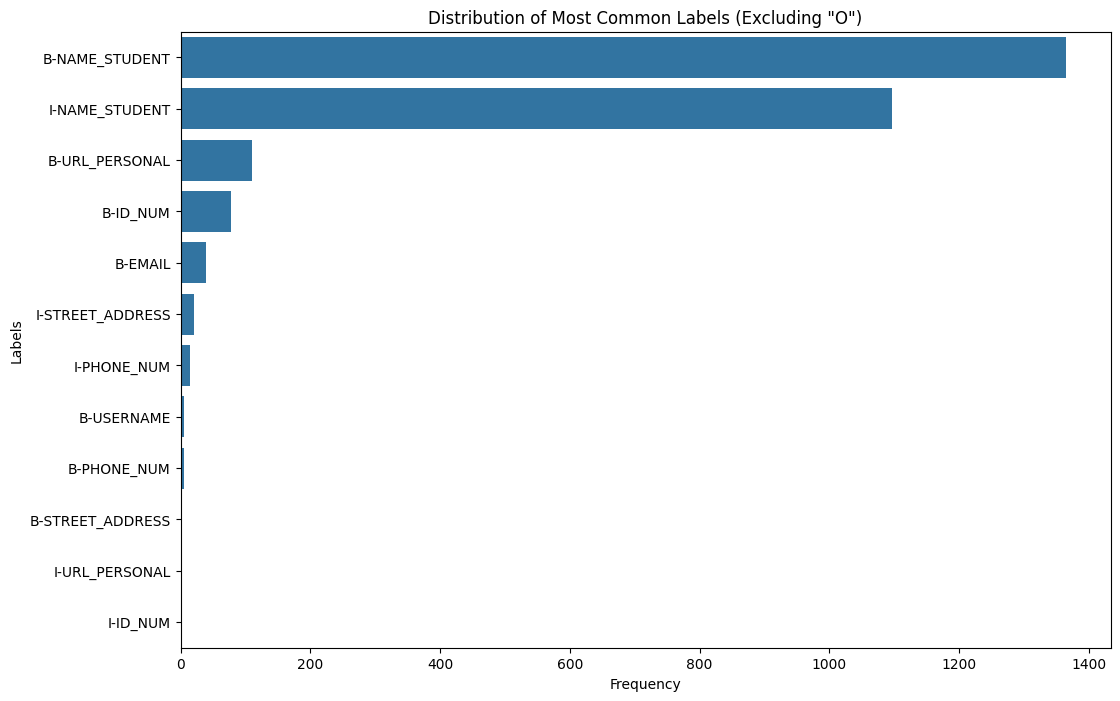

In [11]:
labels_df = pd.DataFrame(most_common_labels, columns=['Label', 'Count']).sort_values(by='Count', ascending=False)

# Here I am visualizing the distribution of the most common labels (except "O")
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Label', data=labels_df[labels_df['Label'] != 'O'])
plt.title('Distribution of Most Common Labels (Excluding "O")')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.show()

##### 5. Pie Chart to depict PII vs Non-PII token count

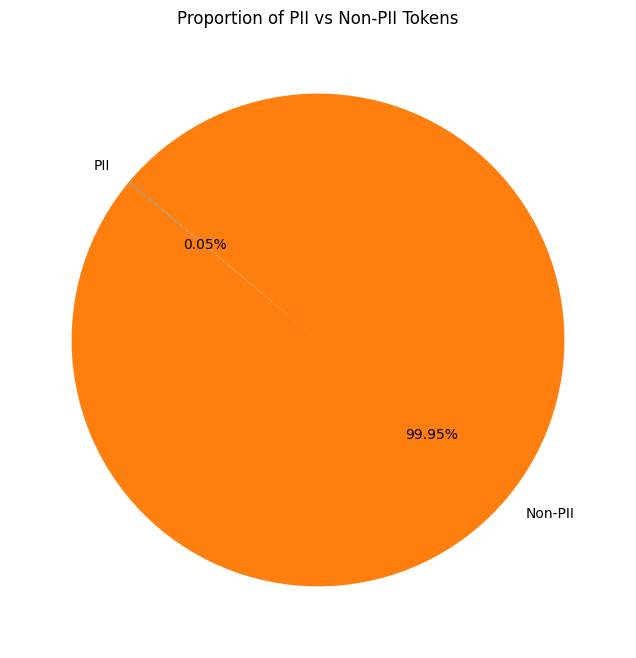

In [12]:
from collections import Counter

labels_flat = [label for sublist in df['labels_list'] for label in sublist]
labels_count = Counter(labels_flat)

total_labels = sum(labels_count.values())
pii_labels = {label: count for label, count in labels_count.items() if label != 'O'}
non_pii_count = labels_count.get('O', 0)

pii_count = sum(pii_labels.values())
pii_proportion = pii_count / total_labels * 100
non_pii_proportion = non_pii_count / total_labels * 100

plt.figure(figsize=(8, 8))
plt.pie([pii_proportion, non_pii_proportion], labels=['PII', 'Non-PII'], autopct='%1.2f%%', startangle=140)
plt.title('Proportion of PII vs Non-PII Tokens')
plt.show()

##### Most common tokens (this part is pretty useless because we already have a nice word cloud)

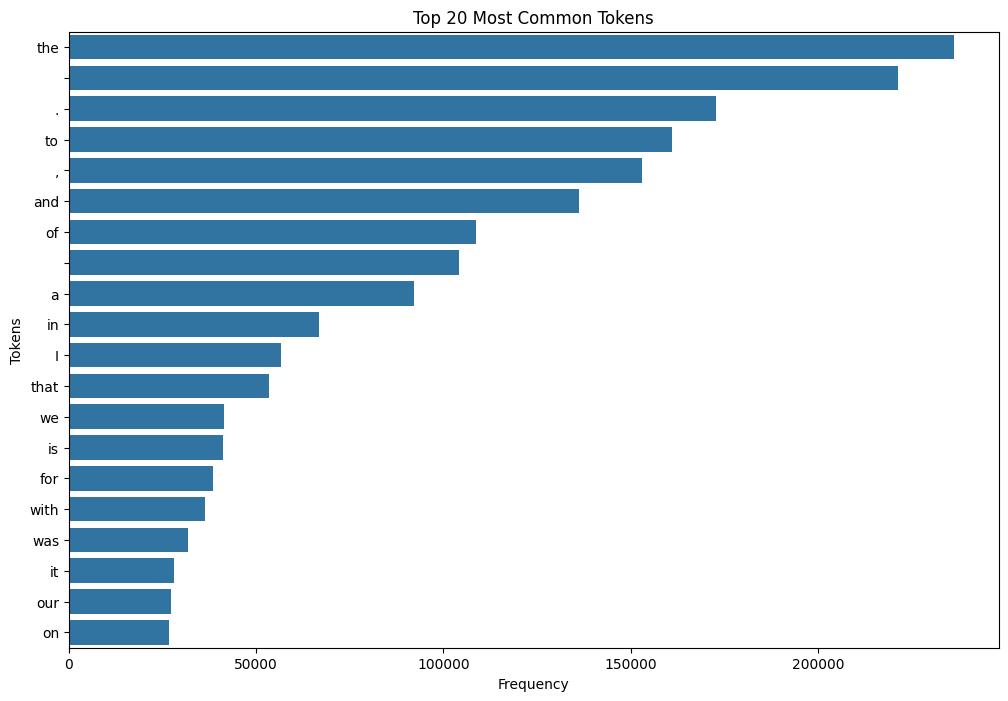

In [13]:
import ast

df['tokens_list'] = df['tokens'].apply(safe_convert)


tokens_flat = [token for sublist in df['tokens_list'] for token in sublist]
tokens_count = Counter(tokens_flat)
most_common_tokens = tokens_count.most_common(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for token, count in most_common_tokens], y=[token for token, count in most_common_tokens])
plt.title('Top 20 Most Common Tokens')
plt.xlabel('Frequency')
plt.ylabel('Tokens')
plt.show()

##### 6. Distribution of document lengths based on the presence of PII

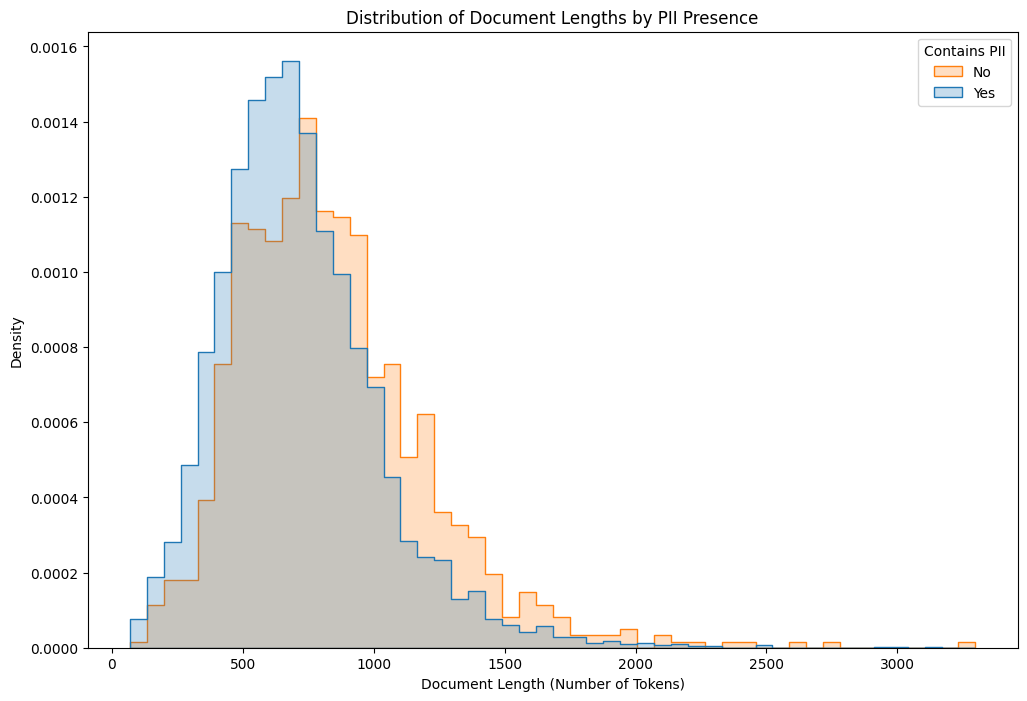

In [17]:
df['contains_pii'] = df['labels_list'].apply(lambda labels: any(label != 'O' for label in labels))

df['doc_length_tokens'] = df['tokens_list'].apply(len)

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='doc_length_tokens', hue='contains_pii', element='step', stat='density', common_norm=False, bins=50)
plt.title('Distribution of Document Lengths by PII Presence')
plt.xlabel('Document Length (Number of Tokens)')
plt.ylabel('Density')
plt.legend(title='Contains PII', labels=['No', 'Yes'])
plt.show()

Both distributions seem to follow a similar pattern, indicating that the presence of PII does not strongly correlate with document length. This suggests that longer documents are not necessarily more likely to contain PII than shorter ones, and vice versa.